In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision = 4,linewidth = 100)

In [4]:
mba_salary = pd.read_csv("MBA salary.csv")
mba_salary.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [8]:
import statsmodels.api as sm
X = sm.add_constant(mba_salary['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [9]:
Y = mba_salary['Salary']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_X, test_X,train_Y,test_Y = train_test_split(X,Y,train_size = 0.8,random_state = 100)

In [17]:
mba_salary_lm = sm.OLS(train_Y, train_X).fit()

In [18]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [20]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-05-20 12:32      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

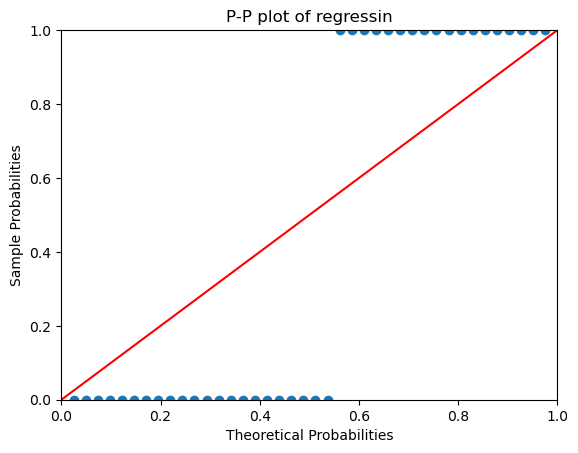

In [32]:
#residual error = actual - predicted
mba_salary_resid = mba_salary_lm.resid;
probplot = sm.ProbPlot(mba_salary_resid);
plt.figure(figsize = (8,6));
probplot.ppplot(line = '45');
plt.title("P-P plot of regressin");
plt.show();